In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\csv_files\zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df = df.drop(['url', 'dish_liked', 'phone'], axis=1)

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [8]:
df.columns
df = df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [9]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',', '.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [10]:
df['rate'].unique()
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
df.name = df.name.apply(lambda x: x.title())
df.online_order.replace(('Yes', 'No'), (True, False), inplace=True)
df.book_table.replace(('Yes', 'No'), (True, False), inplace=True)
df.cost.unique()
df.to_csv('zomato_cleaned.csv', index=False)

In [12]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

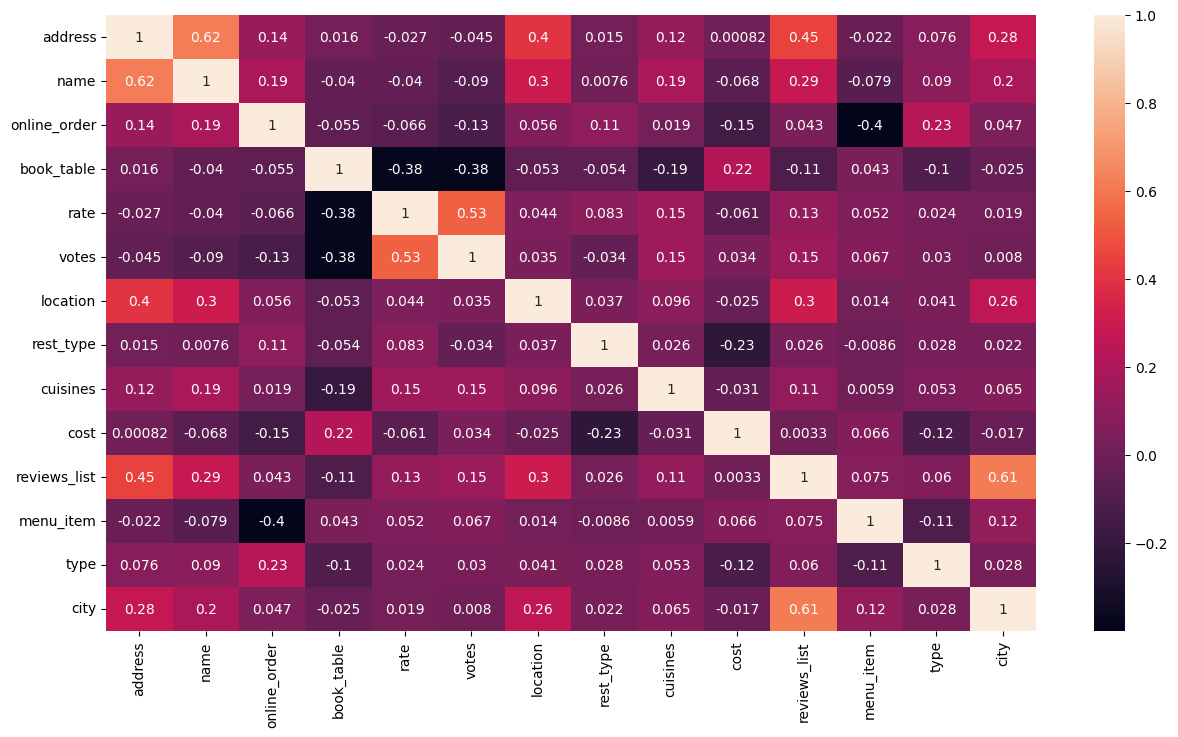

In [13]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
df_en.columns

In [14]:
x = df_en.iloc[:, [2, 3, 5, 6, 7, 8, 9, 11]]
y = df_en['rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=353)
x_train.head()
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.273623372210398

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=105)
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train, y_train)
y_pred = DTree.predict(x_test)
r2_score(y_test, y_pred)

0.8552191797732421

In [17]:
RForest = RandomForestRegressor(n_estimators=500, random_state=329, min_samples_leaf=.0001)
RForest.fit(x_train, y_train)
y_pred = RForest.predict(x_test)
r2_score(y_test, y_pred)

0.877429554411566

In [18]:
ETree = ExtraTreesRegressor(n_estimators=100)
ETree.fit(x_train, y_train)
y_pred = ETree.predict(x_test)
r2_score(y_test, y_pred)

0.9381882936214119

Text(0.5, 1.0, 'Restaurants delivering online or Not')

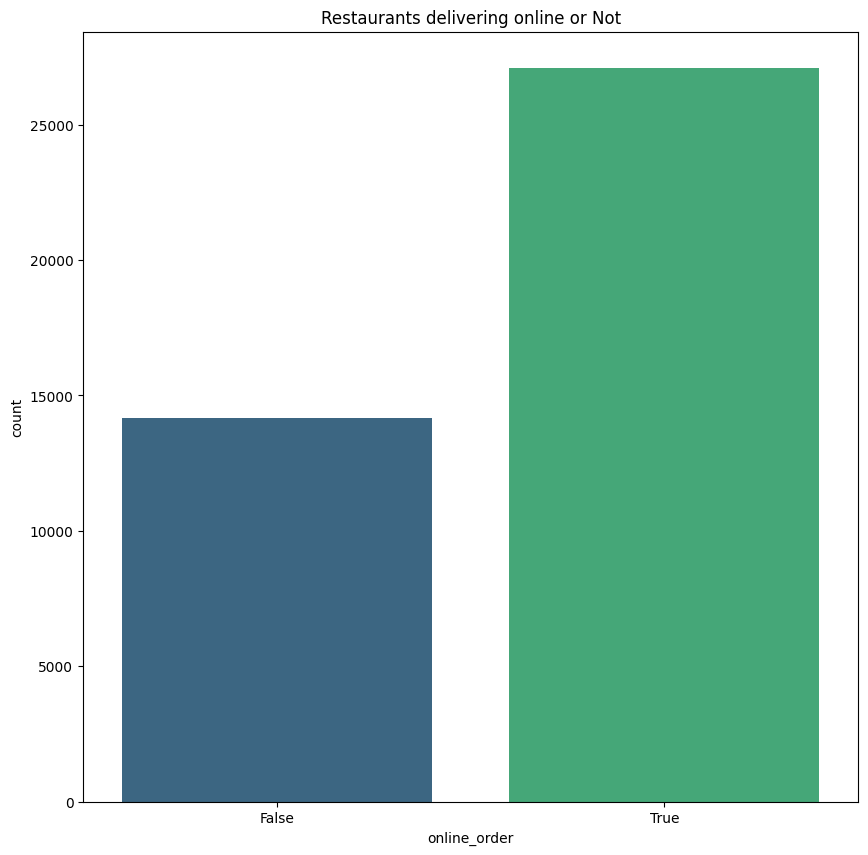

In [19]:
sns.countplot(x='online_order', data=df, palette='viridis')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants that allow table booking or not')

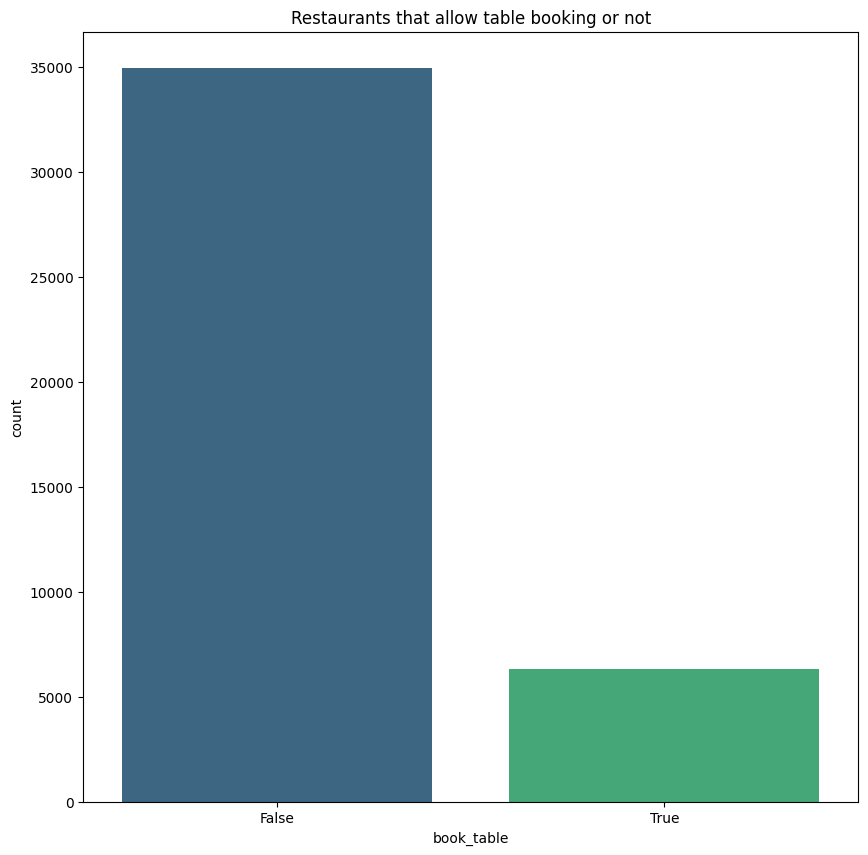

In [20]:
sns.countplot(x='book_table', data=df, palette='viridis')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Restaurants that allow table booking or not')

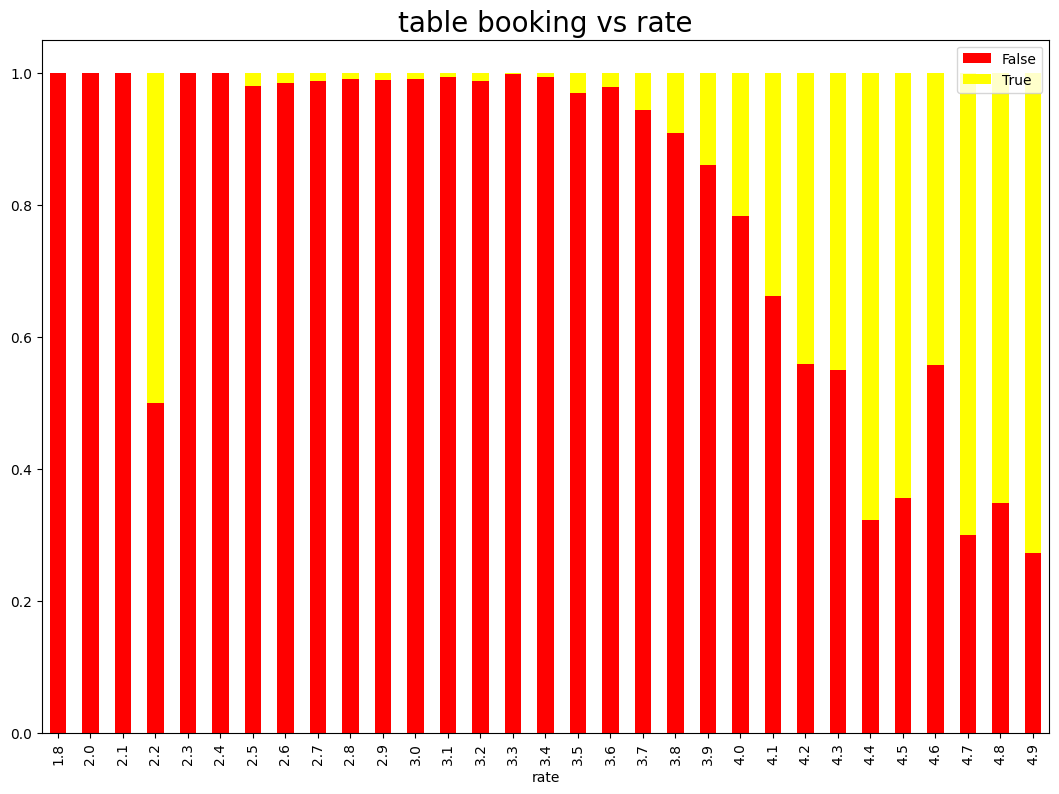

In [21]:
plt.rcParams['figure.figsize'] = 13, 9
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['red', 'yellow'])
plt.title('table booking vs rate', fontweight=30, fontsize=20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location')

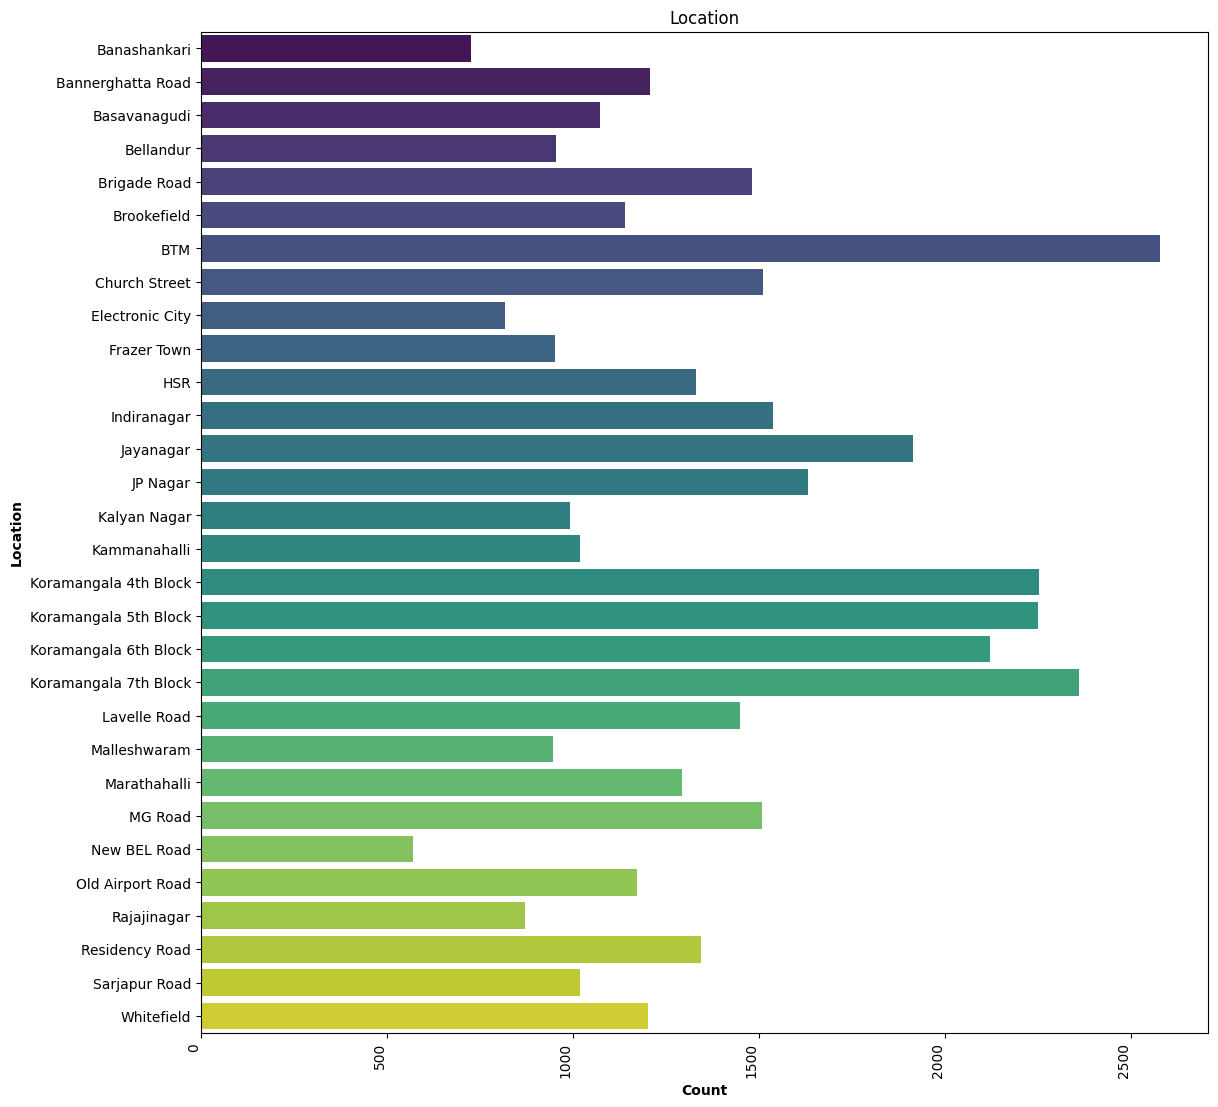

In [32]:
sns.countplot(df['city'], palette='viridis')
sns.countplot(df['city'], palette='viridis').set_xticklabels(sns.countplot(df['city'], palette='viridis').get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13, 13)
plt.xlabel('Count', fontsize=10, fontweight='bold')
plt.ylabel('Location', fontsize=10, fontweight='bold')
plt.title('Location')

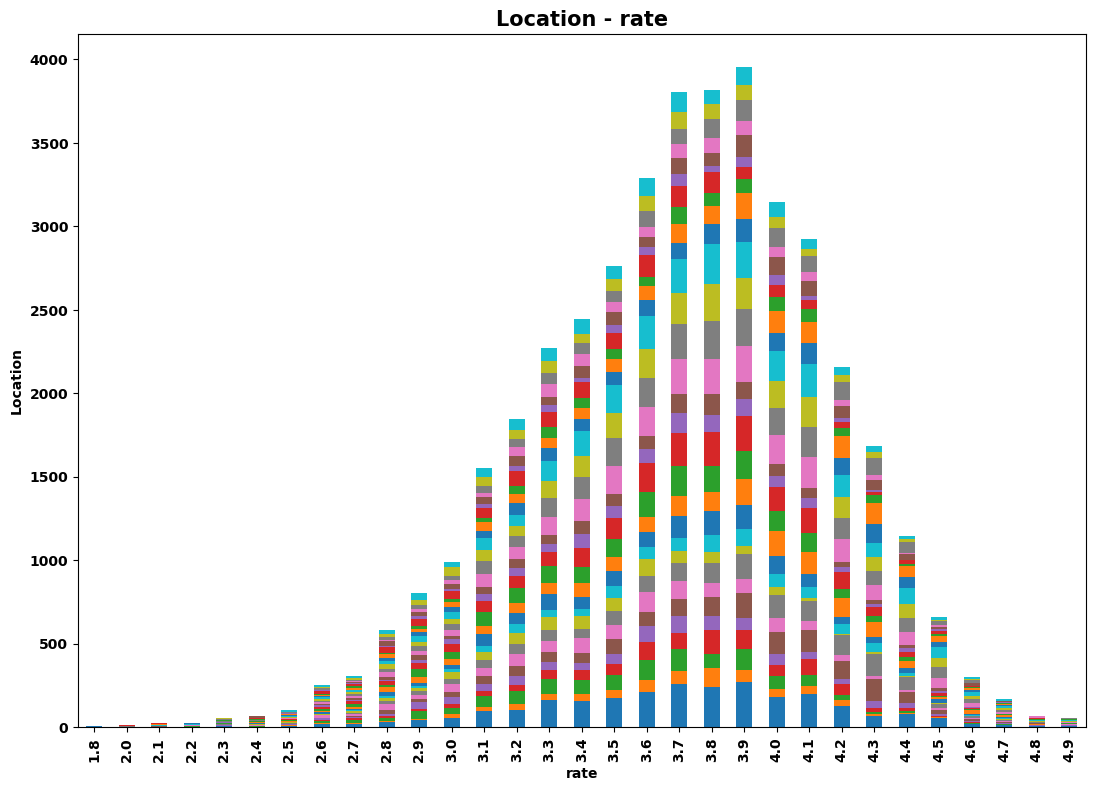

In [39]:
loc_plt = pd.crosstab(df['rate'], df['city'])
loc_plt.plot(kind='bar', stacked=True)
plt.title('Location - rate', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=10, fontweight='bold')
plt.xlabel('rate', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend().remove()

Text(0.5, 1.0, 'Restaurant Type')

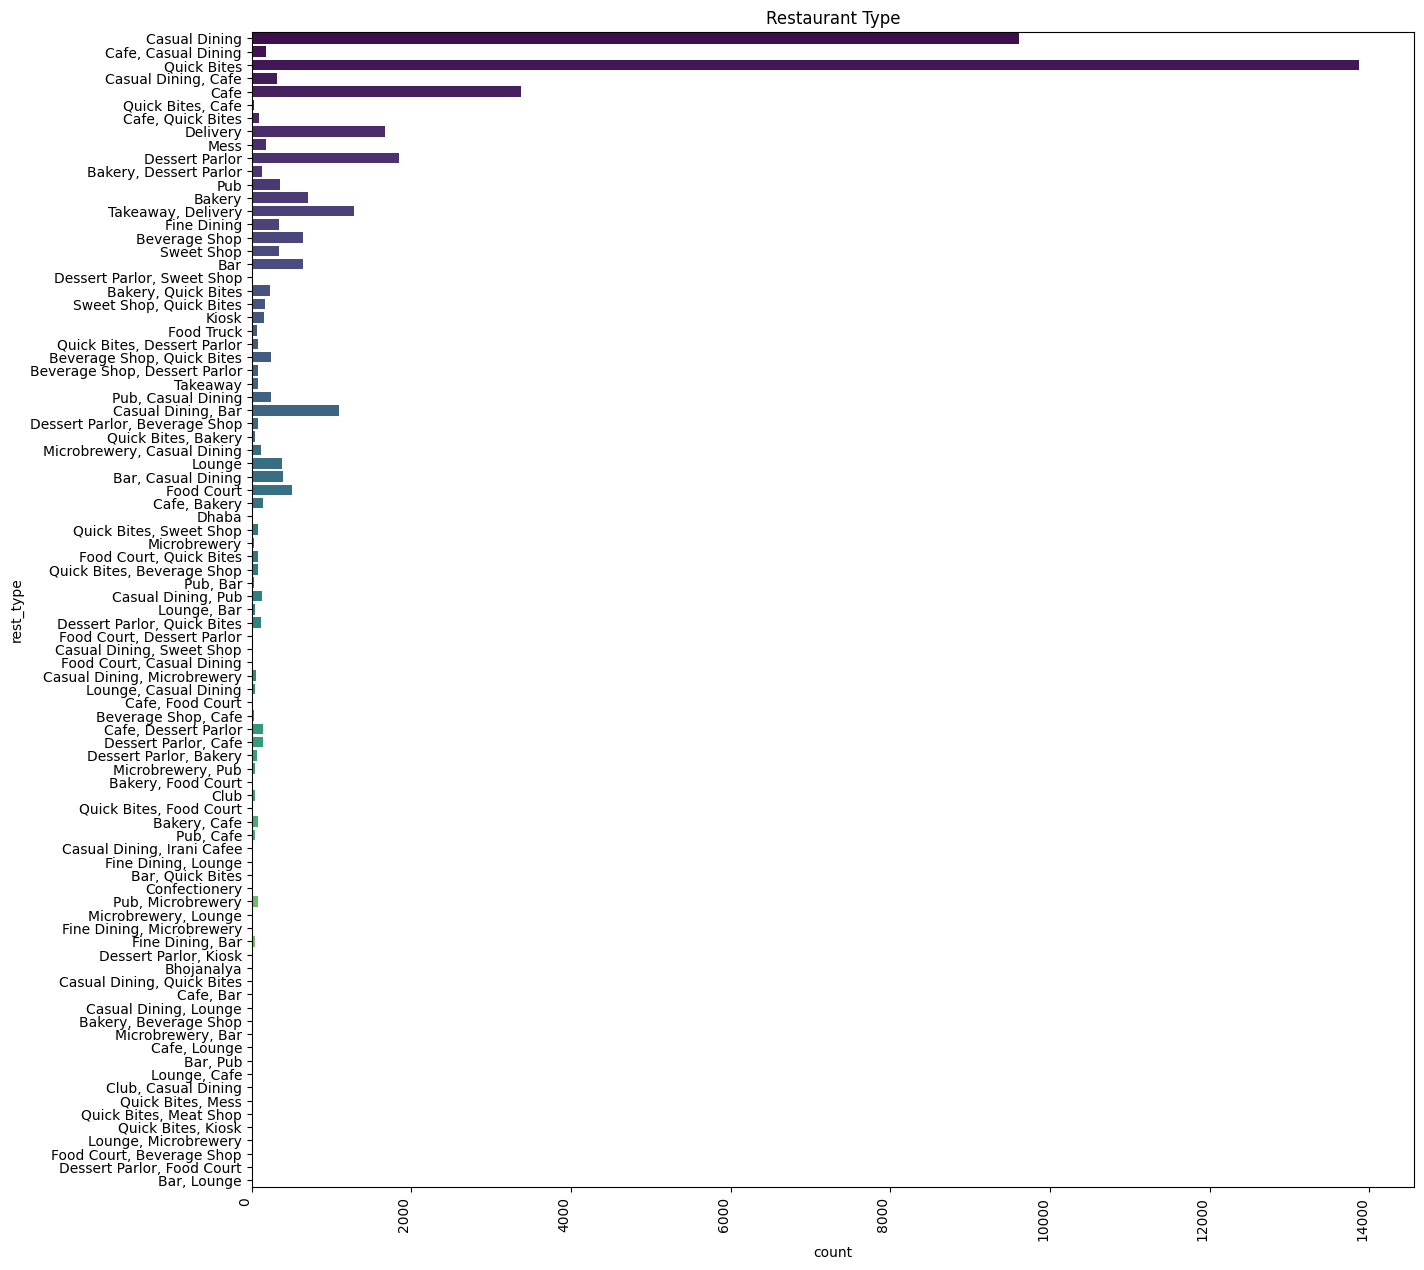

In [33]:
sns.countplot(df['rest_type'], palette='viridis')
sns.countplot(df['rest_type'], palette='viridis').set_xticklabels(sns.countplot(df['rest_type'], palette='viridis').get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.title('Restaurant Type')

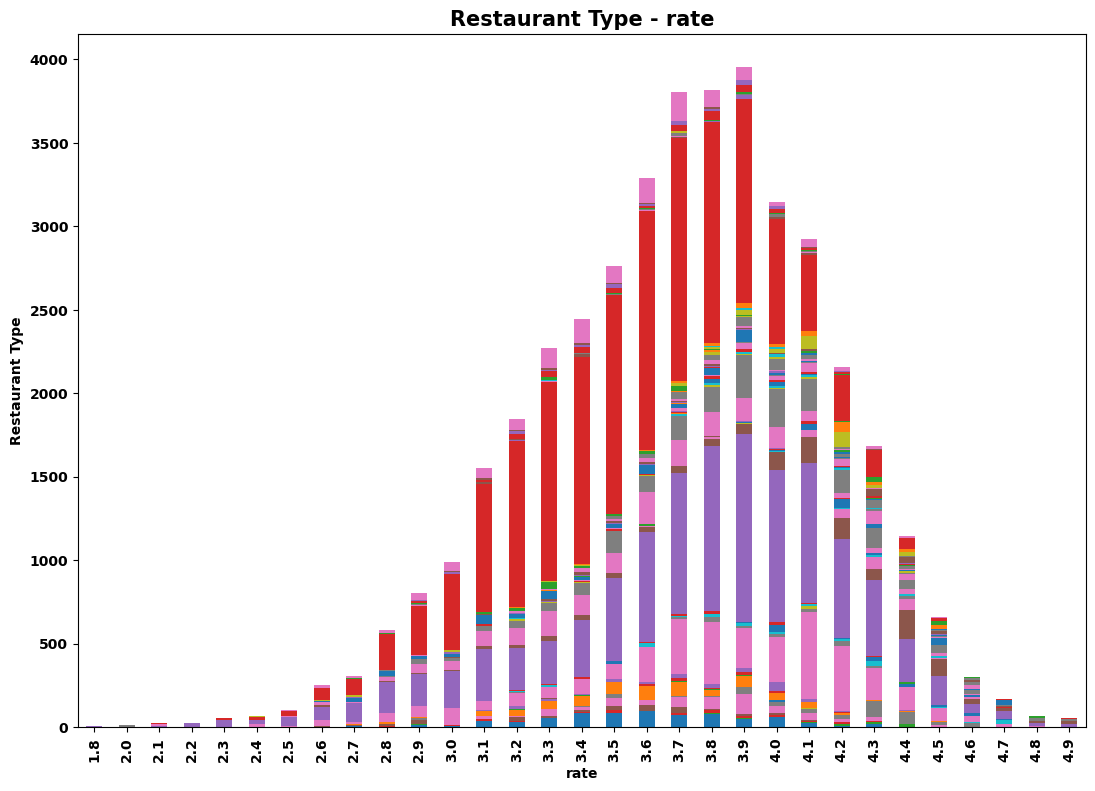

In [35]:
loc_plt = pd.crosstab(df['rate'], df['rest_type'])
loc_plt.plot(kind='bar', stacked=True)
plt.title('Restaurant Type - rate', fontsize=15, fontweight='bold')
plt.ylabel('Restaurant Type', fontsize=10, fontweight='bold')
plt.xlabel('rate', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend().remove()

Text(0.5, 1.0, 'Type of Service')

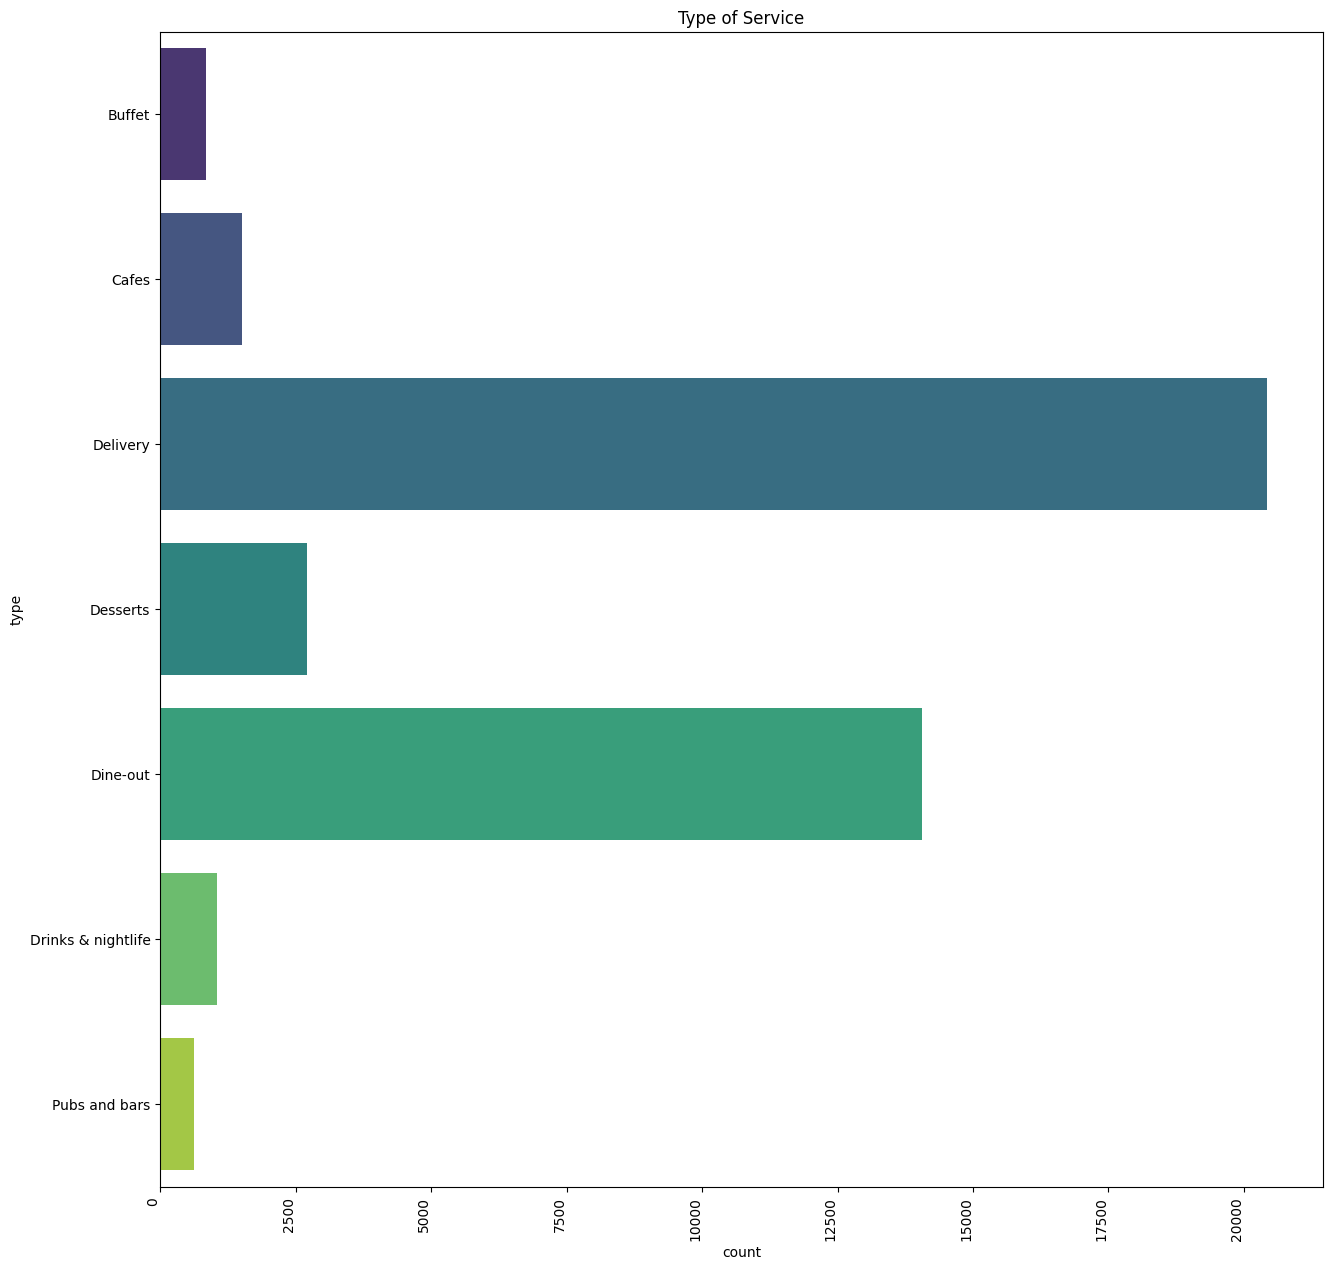

In [26]:
sns.countplot(df['type'], palette='viridis')
sns.countplot(df['type'], palette='viridis').set_xticklabels(sns.countplot(df['type'], palette='viridis').get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.title('Type of Service')

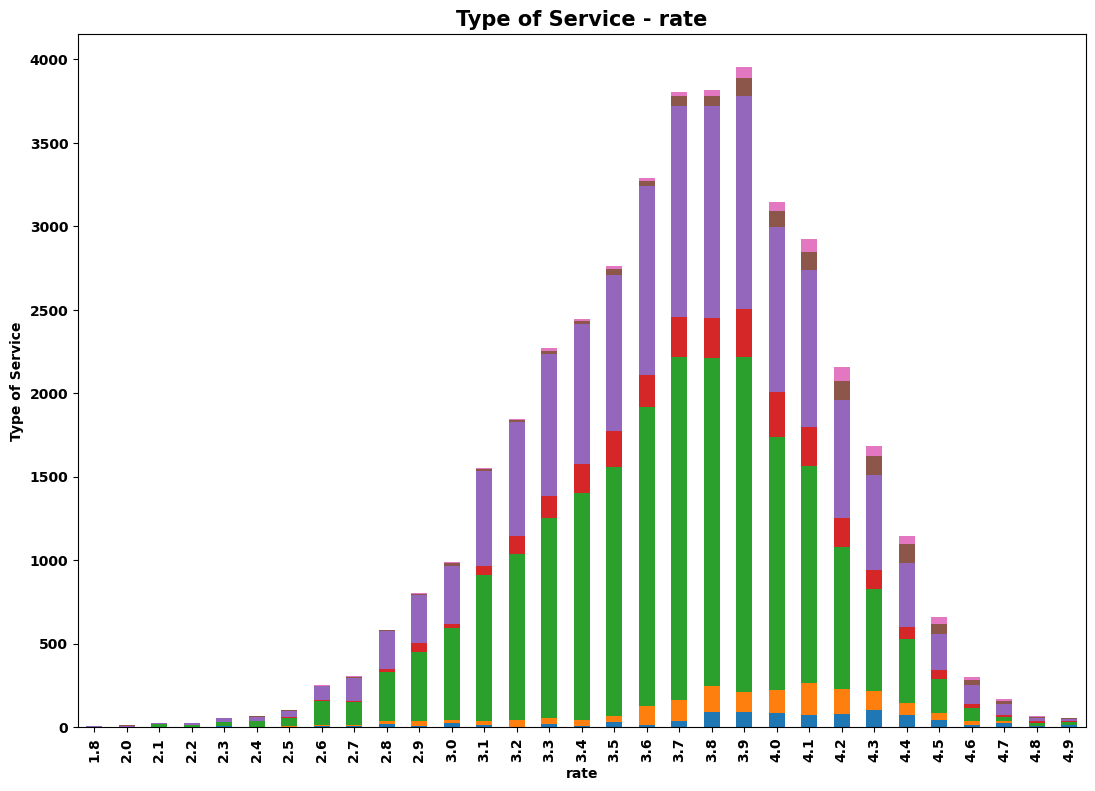

In [40]:
type_plt = pd.crosstab(df['rate'], df['type'])
type_plt.plot(kind='bar', stacked=True)
plt.title('Type of Service - rate', fontsize=15, fontweight='bold')
plt.ylabel('Type of Service', fontsize=10, fontweight='bold')
plt.xlabel('rate', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend().remove()

Text(0.5, 1.0, 'Cost of Restaurant')

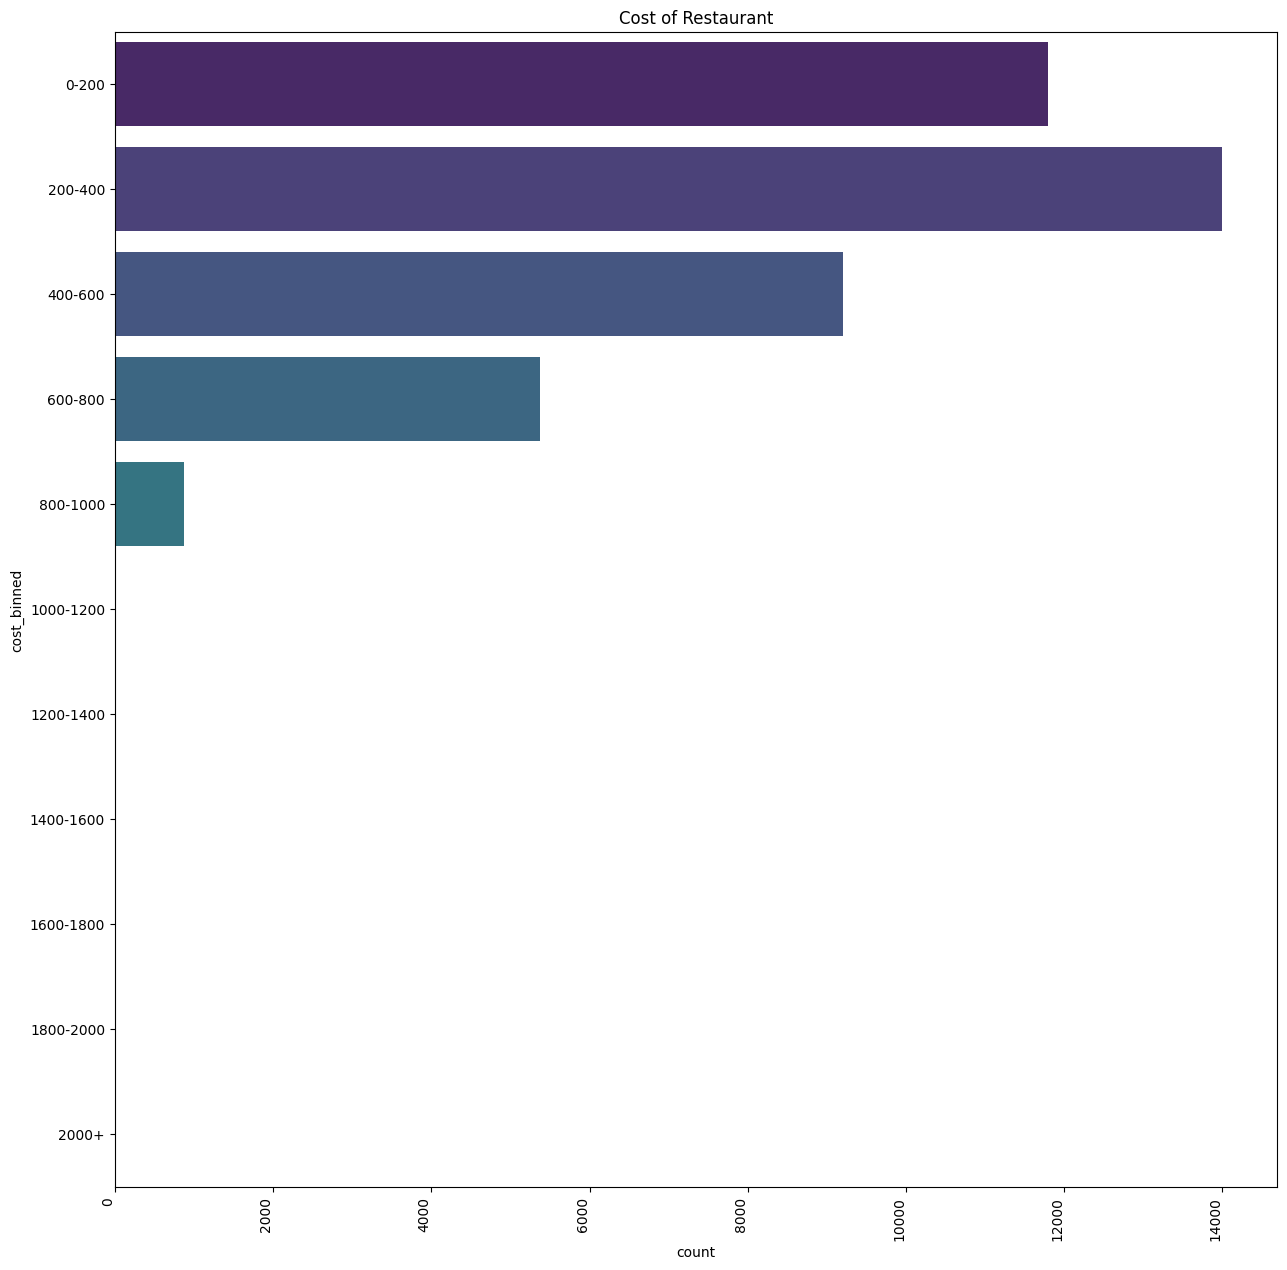

In [28]:
# Binning the 'cost' column
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, np.inf]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '2000+']
df['cost_binned'] = pd.cut(df['cost'], bins=bins, labels=labels)

# Plotting the binned 'cost' column
sns.countplot(df['cost_binned'], palette='viridis')
sns.countplot(df['cost_binned'], palette='viridis').set_xticklabels(sns.countplot(df['cost_binned'], palette='viridis').get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.title('Cost of Restaurant')

Text(0.5, 1.0, 'No. of restaurants in a Location')

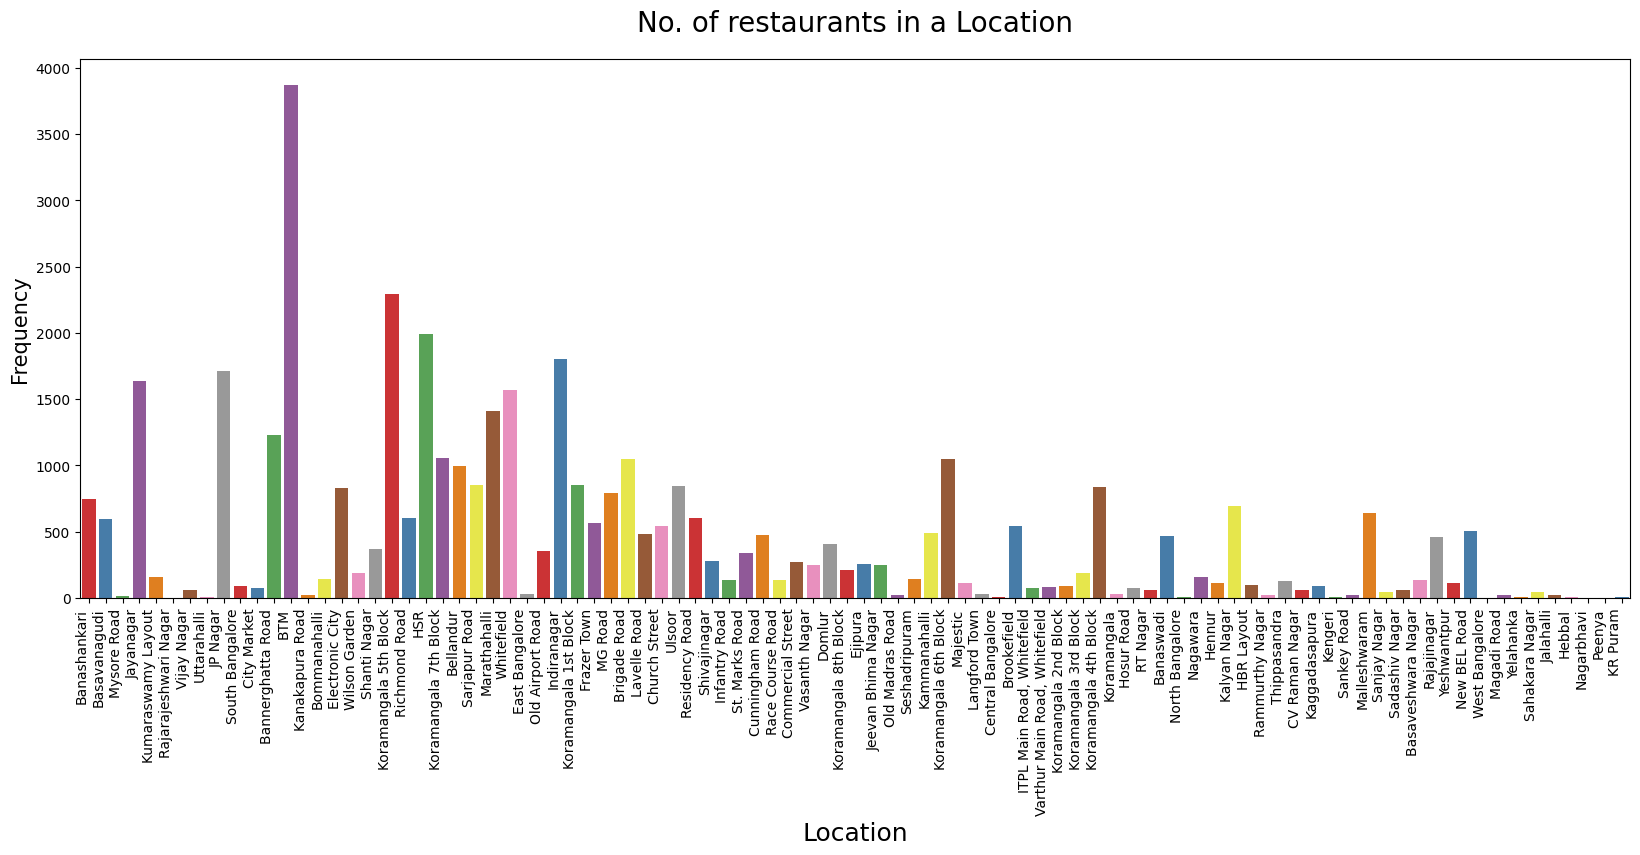

In [34]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

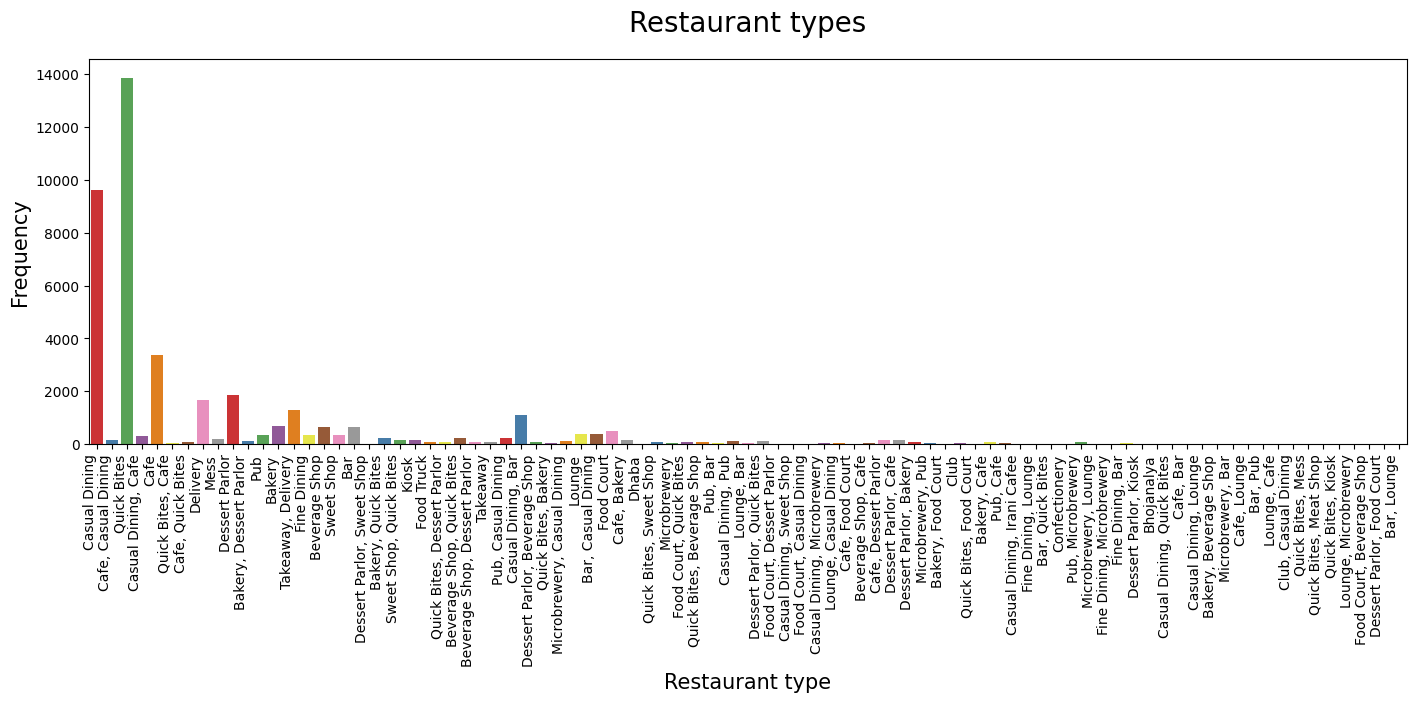

In [30]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

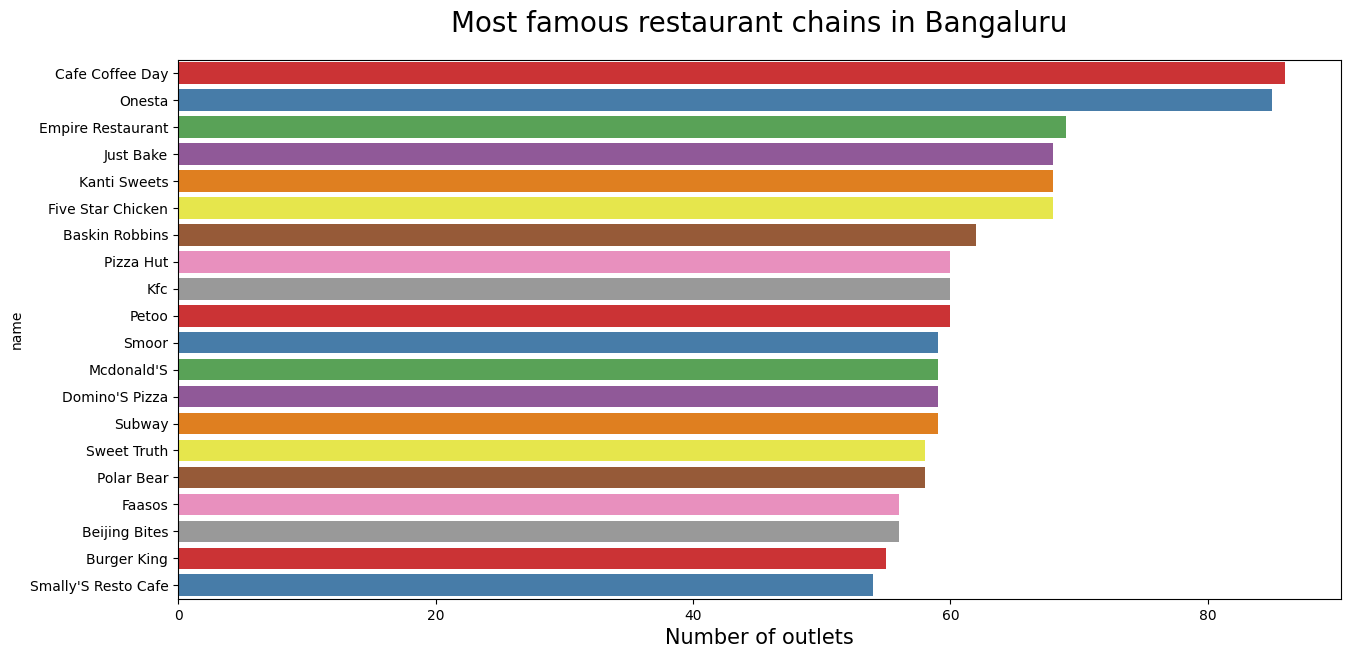

In [31]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)